In [1]:
!pip install transformers

In [2]:
!pip install datasets

In [3]:
from datasets import list_datasets

In [4]:
all_datasets = list_datasets()
print(f"There are {len(all_datasets)} datasets currently on the hub")
print(f"First 10 are: {all_datasets[:10]}")

<ipython-input-4-edfcbcc1bbbb>:1: FutureWarning: list_datasets is deprecated and will be removed in the next major version of datasets. Use 'huggingface_hub.list_datasets' instead.
  all_datasets = list_datasets()


There are 50270 datasets currently on the hub
First 10 are: ['acronym_identification', 'ade_corpus_v2', 'adversarial_qa', 'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'ai2_arc', 'air_dialogue', 'ajgt_twitter_ar', 'allegro_reviews']


In [5]:
from datasets import load_dataset
emotions = load_dataset("emotion")
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [6]:
train_ds = emotions['train']
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [7]:
len(train_ds)

16000

In [8]:
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [9]:
train_ds.column_names

['text', 'label']

In [10]:
train_ds.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [11]:
import pandas as pd
emotions.set_format(type = "pandas")
df = emotions['train'][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [12]:
def label_int2str(row):
  return emotions["train"].features["label"].int2str(row)

df['label_name'] = df['label'].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


<Axes: xlabel='label_name', ylabel='count'>

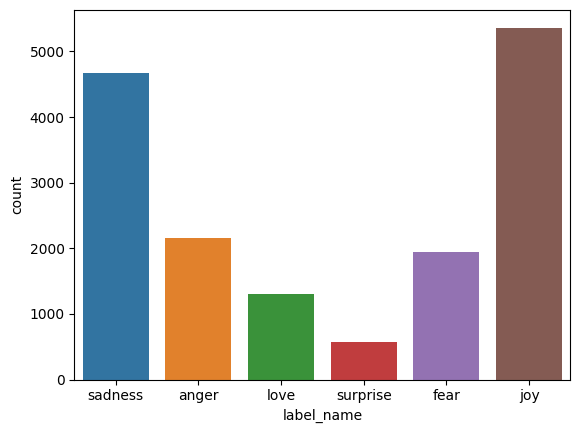

In [13]:
import seaborn as sns
sns.countplot(x = df['label_name'])

In [14]:
df['words per tweet'] = df['text'].str.split().apply(len)
df.head()

,text,label,label_name,words per tweet
0,i didnt feel humiliated,0,sadness,4
1,i can go from feeling so hopeless to so damned...,0,sadness,21
2,im grabbing a minute to post i feel greedy wrong,3,anger,10
3,i am ever feeling nostalgic about the fireplac...,2,love,18
4,i am feeling grouchy,3,anger,4


<Axes: xlabel='label_name', ylabel='words per tweet'>

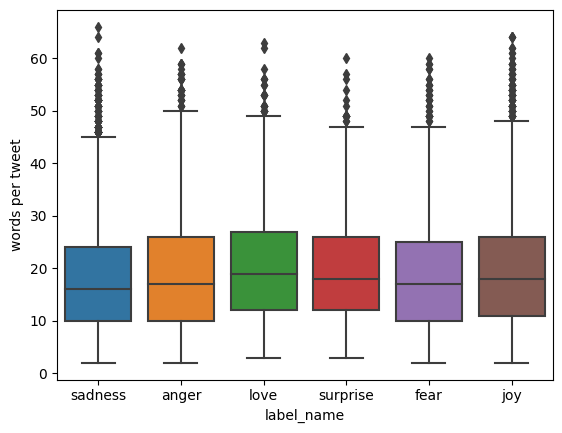

In [15]:
sns.boxplot(data = df, y = 'words per tweet' ,x = 'label_name')

In [16]:
emotions.reset_format()

# Character Tokenization

In [17]:
text = "Tokenizing text is a core task of NLP."
tokenized_text = list(text)
print(tokenized_text)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P', '.']


In [18]:
token2idx = {ch: idx  for idx, ch in enumerate(sorted(set(tokenized_text)))}

In [19]:
input_ids = [token2idx[token] for token in tokenized_text]
print(input_ids)

[5, 14, 12, 8, 13, 11, 19, 11, 13, 10, 0, 17, 8, 18, 17, 0, 11, 16, 0, 6, 0, 7, 14, 15, 8, 0, 17, 6, 16, 12, 0, 14, 9, 0, 3, 2, 4, 1]


In [20]:
import torch
import torch.nn.functional as F
input_ids = torch.tensor(input_ids, dtype = torch.long)
one_hot_encodings = F.one_hot(input_ids, num_classes = len(token2idx))
one_hot_encodings.shape

torch.Size([38, 20])

In [21]:
print(f"Token: {tokenized_text[0]}")
print(f"Tensor Index: {input_ids[0]}")
print(f"One hot: {one_hot_encodings[0]}")

Token: T
Tensor Index: 5
One hot: tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


In [22]:
tokenized_text = text.split()
print(tokenized_text)

['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP.']


In [23]:
from transformers import AutoTokenizer
model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [24]:
from transformers import DistilBertTokenizer
distilbert_tokenizer = DistilBertTokenizer.from_pretrained(model_ckpt)

In [25]:
encoded_text = tokenizer(text)
encoded_text

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [26]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.', '[SEP]']


In [27]:
tokenizer.convert_tokens_to_string(tokens)

'[CLS] tokenizing text is a core task of nlp. [SEP]'

In [28]:
tokenizer.vocab_size, tokenizer.model_max_length, tokenizer.model_input_names

(30522, 512, ['input_ids', 'attention_mask'])

In [29]:
def tokenize(batch):
  return tokenizer(batch['text'], padding = True, truncation = True)

print(tokenize(emotions['train'][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [30]:
emotions_encoded = emotions.map(tokenize, batched = True, batch_size = None)
emotions_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

In [31]:
print(emotions_encoded["train"].column_names)

['text', 'label', 'input_ids', 'attention_mask']


In [32]:
from transformers import AutoModel
model_ckpt = "distilbert-base-uncased"
device = torch.device('cuda' if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

In [33]:
text = "This is a test string"
inputs = tokenizer(text, return_tensors = "pt")
print(f"Input Tensor shape: {inputs['input_ids'].size()}")

Input Tensor shape: torch.Size([1, 7])


In [34]:
inputs = {k:v.to(device) for k, v in inputs.items()}

In [35]:
with torch.no_grad():
  outputs = model(**inputs)
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1831, -0.3850, -0.0266,  ..., -0.1292, -0.0365,  0.7005],
         [-0.3401, -0.6959, -0.0926,  ..., -0.3377,  0.0925,  0.5839],
         [-0.3188, -0.5166,  0.1711,  ..., -0.2602, -0.2791,  1.1369],
         ...,
         [ 0.4914, -0.4535, -0.0129,  ..., -0.7029, -0.1289, -0.4060],
         [ 0.2002, -0.5332, -0.2342,  ..., -0.1235, -0.0242,  0.4007],
         [ 0.9794, -0.0094, -0.5394,  ...,  0.2251, -0.8002, -0.1065]]],
       device='cuda:0'), hidden_states=None, attentions=None)


In [36]:
outputs.last_hidden_state.size()

torch.Size([1, 7, 768])

In [37]:
outputs.last_hidden_state[:, 0].size()

torch.Size([1, 768])

In [38]:
def extract_hidden_states(batch):
  inputs = {k: v.to(device) for k, v in batch.items() if k in tokenizer.model_input_names}

  with torch.no_grad():
    last_hidden_state = model(**inputs).last_hidden_state

  return {"hidden_state": last_hidden_state[:, 0].cpu().numpy()}


In [39]:
emotions_encoded.set_format("torch", columns = ["input_ids", "attention_mask", "label"])

In [40]:
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched = True)

In [41]:
emotions_hidden["train"].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

In [42]:
import numpy as np
X_train = np.array(emotions_hidden["train"]["hidden_state"])
X_valid = np.array(emotions_hidden["validation"]["hidden_state"])
y_train = np.array(emotions_hidden["train"]["label"])
y_valid = np.array(emotions_hidden["validation"]["label"])

X_train.shape, y_train.shape

((16000, 768), (16000,))

In [43]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

X_scaled = MinMaxScaler().fit_transform(X_train)
mapper = PCA(n_components = 2).fit(X_scaled)

In [45]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

X_scaled = MinMaxScaler().fit_transform(X_train)
mapper = PCA(n_components = 2).fit_transform(X_scaled)
df_emb = pd.DataFrame(mapper, columns = ["X", "Y"])
df_emb["label"] = y_train
df_emb.head()


,X,Y,label
0,0.052263,-2.044799,0
1,-0.611240,0.071184,0
2,0.172693,-1.991042,3
3,-0.632668,0.384491,2
4,-1.145685,-0.882582,3


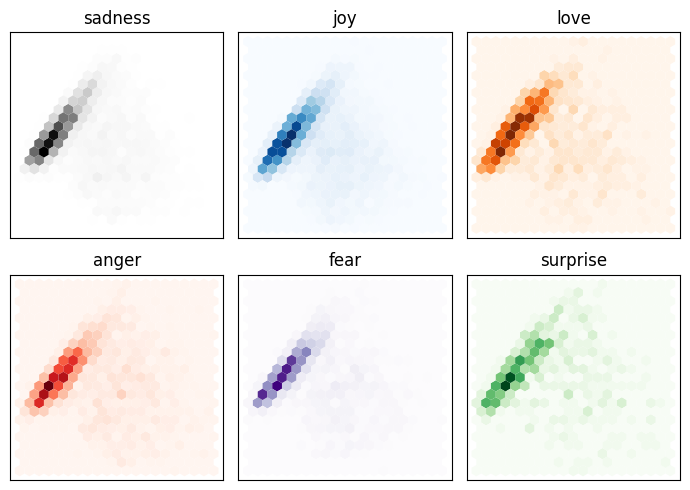

In [46]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize = (7, 5))
axes = axes.flatten()
cmaps = ["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens"]
labels = emotions['train'].features['label'].names
for i, (label, cmap) in enumerate(zip(labels, cmaps)):
  df_emb_sub = df_emb.query(f"label == {i}")
  axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap = cmap, gridsize = 20, linewidths = (0, ))
  axes[i].set_title(label)
  axes[i].set_xticks([]), axes[i].set_yticks([])

plt.tight_layout()
plt.show()

In [47]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_valid, y_valid)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6075

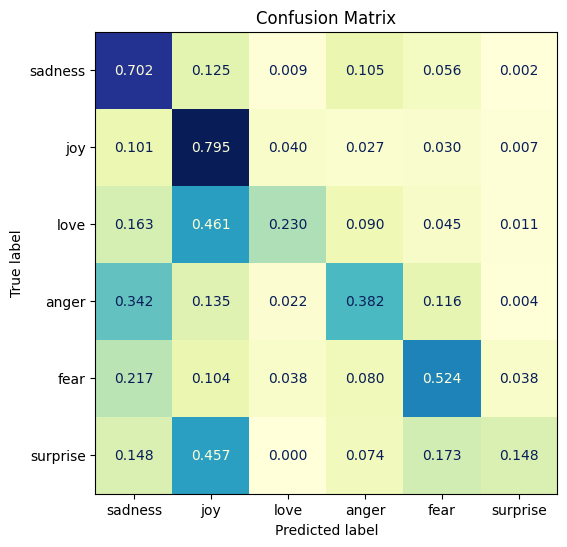

In [48]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
  cm = confusion_matrix(y_true, y_preds, normalize = "true")
  fig, ax = plt.subplots(figsize = (6,6 ))
  disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
  disp.plot(cmap = "YlGnBu", values_format = ".3f", ax = ax, colorbar = False)
  plt.title("Confusion Matrix")
  plt.show()


y_preds = lr.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)

In [49]:
from transformers import AutoModelForSequenceClassification
num_labels = 6
model = (AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels = num_labels).to(device))

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'pre_classifier.bias', 'pre_classifier.weight', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [56]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  f1 = f1_score(labels, preds, average = "weighted")
  acc = accuracy_score(labels, preds)
  return {"accuracy": acc, "f1": f1}

In [51]:
from huggingface_hub import notebook_login
# notebook_login()

In [52]:
!pip install accelerate -U

In [53]:
from transformers import Trainer, TrainingArguments
batch_size = 64
logging_steps = len(emotions_encoded['train']) // batch_size
model_name = f"{model_ckpt}-finetuned-emotion"
training_args = TrainingArguments(output_dir = model_name,
                                  num_train_epochs = 2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size = batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay = 0.01,
                                  evaluation_strategy = "epoch",
                                  disable_tqdm = False,
                                  logging_steps = logging_steps,
                                  # push_to_hub = True,
                                  log_level = "error")

In [57]:
trainer = Trainer(model = model, args = training_args,
                  compute_metrics = compute_metrics,
                  train_dataset = emotions_encoded['train'],
                  eval_dataset = emotions_encoded['validation'],
                  tokenizer = tokenizer)

trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.206700,0.188222,0.927500,0.928316
2,0.135800,0.161693,0.931500,0.931983


TrainOutput(global_step=500, training_loss=0.1712504196166992, metrics={'train_runtime': 239.9911, 'train_samples_per_second': 133.338, 'train_steps_per_second': 2.083, 'total_flos': 720342861696000.0, 'train_loss': 0.1712504196166992, 'epoch': 2.0})

In [58]:
preds_output = trainer.predict(emotions_encoded["validation"])
preds_output.metrics

{'test_loss': 0.1616927832365036,
 'test_accuracy': 0.9315,
 'test_f1': 0.931983281654258,
 'test_runtime': 5.2126,
 'test_samples_per_second': 383.686,
 'test_steps_per_second': 6.139}

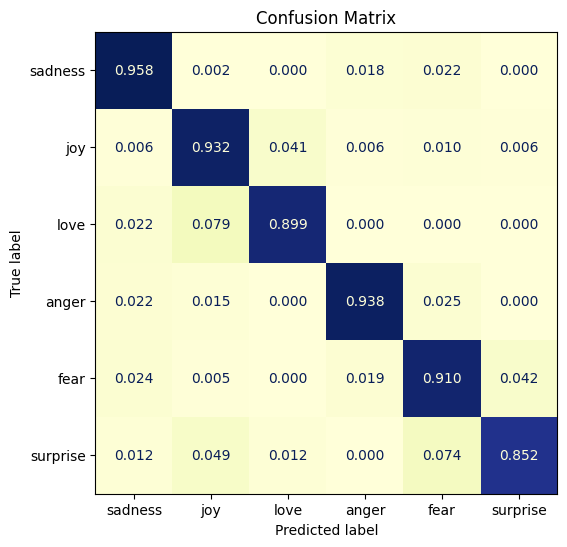

In [63]:
y_preds = np.argmax(preds_output.predictions, axis = 1)
plot_confusion_matrix(y_preds, y_valid, labels)

In [64]:
from torch.nn.functional import cross_entropy

def forward_pass_with_label(batch):
  inputs = {k:v.to(device) for k, v in batch.items() if k in tokenizer.model_input_names}

  with torch.no_grad():
    output = model(**inputs)
    pred_label = torch.argmax(output.logits, axis = -1)
    loss = cross_entropy(output.logits, batch['label'].to(device),
                         reduction = "none")

  return {
      "loss": loss.cpu().numpy(),
      "predicted_label": pred_label.cpu().numpy()
  }


In [66]:
emotions_encoded.set_format('torch',
                            columns = ["input_ids", "attention_mask", "label"])

emotions_encoded["validation"] = emotions_encoded["validation"].map(
    forward_pass_with_label, batched = True, batch_size = 16
)

emotions_encoded.set_format('pandas')
cols = ['text', 'label', 'predicted_label', 'loss']
df_test = emotions_encoded["validation"][:][cols]
df_test["label"] = df_test["label"].apply(label_int2str)
df_test["predicted_label"] = (df_test["predicted_label"].apply(label_int2str))

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [67]:
df_test

,text,label,predicted_label,loss
0,im feeling quite sad and sorry for myself but ...,sadness,sadness,0.004017
1,i feel like i am still looking at a blank canv...,sadness,sadness,0.005127
2,i feel like a faithful servant,love,love,0.366132
3,i am just feeling cranky and blue,anger,anger,0.007612
4,i can have for a treat or if i am feeling festive,joy,joy,0.003318
...,...,...,...,...
1995,im having ssa examination tomorrow in the morn...,sadness,sadness,0.007994
1996,i constantly worry about their fight against n...,joy,joy,0.003742
1997,i feel its important to share this info for th...,joy,joy,0.007231
1998,i truly feel that if you are passionate enough...,joy,joy,0.459809


In [68]:
df_test.sort_values("loss", ascending = False).head(10)

,text,label,predicted_label,loss
1950,i as representative of everything thats wrong ...,surprise,sadness,7.471437
1963,i called myself pro life and voted for perry w...,joy,sadness,6.554758
1500,i guess we would naturally feel a sense of lon...,anger,sadness,6.395686
318,i felt ashamed of these feelings and was scare...,fear,sadness,6.393015
1509,i guess this is a memoir so it feels like that...,joy,fear,6.371346
1111,im lazy my characters fall into categories of ...,joy,fear,5.993899
1870,i guess i feel betrayed because i admired him ...,joy,sadness,5.955613
882,i feel badly about reneging on my commitment t...,love,sadness,5.924912
1840,id let you kill it now but as a matter of fact...,joy,fear,5.199992
1683,i had applied for a job and they had assured m...,anger,joy,5.072416


In [69]:
df_test.sort_values("loss", ascending = True).head(10)

,text,label,predicted_label,loss
1873,i feel practically virtuous this month i have ...,joy,joy,0.002802
620,i shall move right along to the post interview...,joy,joy,0.002931
329,i have had my treasury selection on the front ...,joy,joy,0.002933
702,i only find out that they are looking and feel...,joy,joy,0.002945
1090,i dont know what it is about me and sweets the...,joy,joy,0.002957
604,i don t like to use the h word recklessly but ...,joy,joy,0.002981
1780,ive explained that he is very creative and lov...,joy,joy,0.002996
400,i are just relaxing together and i feel ecstat...,joy,joy,0.002998
452,i manage to complete the lap not too far behin...,joy,joy,0.003008
1263,i feel this way about blake lively,joy,joy,0.003045
